PROJECT OVERVIEW:-


During my internship at YBI Foundation, I worked on the Real Estate House Price Prediction project, using Linear Regression to predict housing prices based on several features from the dataset. These features included number of bedrooms, number of bathrooms, square footage of living space (Sqft_living), lot size (Sqft_lot), number of floors, waterfront view, and other relevant attributes. The project involved key stages including data preprocessing, visualization, model training, and evaluation.

Data Preprocessing


The first step in building the model was to preprocess the data. I loaded the dataset, handled missing values, and ensured that the features were appropriately formatted for modeling. I dropped irrelevant columns such as ID and Date since they do not contribute to predicting house prices.

In [ ]:
# DATA PREPROCESSING

import pandas as pd

# Load the dataset
data = pd.read_csv(r"D:\\Mini Projects\\YBI-Foundation\\House Prices.csv")

# Drop irrelevant columns
data = data.drop(columns=['ID', 'Date'])

# Handle missing values (dropping rows with missing values)
data = data.dropna()

# Display the first few rows of the dataset
print(data.head())


      Price  Bedrooms  Bathrooms  Sqft_living  Sqft_lot  Floors  Waterfront  \
0  280000.0         6       3.00         2400      9373     2.0           0   
1  300000.0         6       3.00         2400      9373     2.0           0   
2  647500.0         4       1.75         2060     26036     1.0           0   
3  400000.0         3       1.00         1460     43000     1.0           0   
4  235000.0         3       1.00         1430      7599     1.5           0   

   View  Condition  Grade  Sqft_above  Sqft_basement  Yr_built  Yr_renovated  \
0     0          3      7        2400              0      1991             0   
1     0          3      7        2400              0      1991             0   
2     0          4      8        1160            900      1947             0   
3     0          3      7        1460              0      1952             0   
4     0          4      6        1010            420      1930             0   

   zipcode      Lat     Long  Sqft_living15 

Data Visualization
To understand the relationships between the features and house prices, I created visualizations. For example, I created a scatter plot showing the relationship between number of bedrooms and house price to help identify any trends in the data.

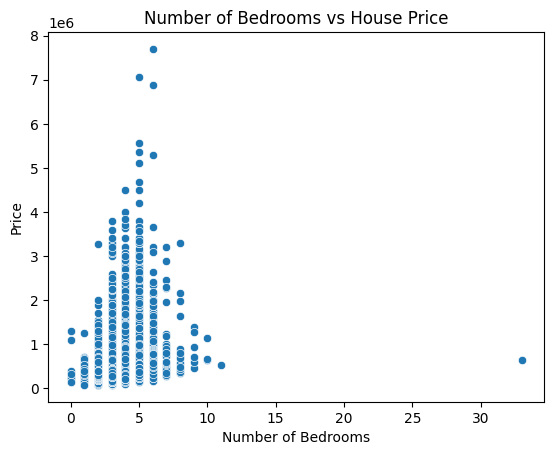

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for number of bedrooms vs house price
sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Number of Bedrooms vs House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


Model Development
After preprocessing the data, I separated the features (independent variables) and the target variable (Price). The dataset was then split into training and testing sets. I used Linear Regression to train the model, fitting it to the training data and predicting house prices for the test set.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)



Model Evaluation
To evaluate the performance of the model, I used Mean Squared Error (MSE) and R-squared (R²) metrics. These metrics helped in assessing the accuracy of the model’s predictions. MSE shows the average squared difference between the predicted and actual prices, while R² indicates how well the model explains the variance in the house prices.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 124480.73
MSE: 36454956469.42
RMSE: 190931.81
R²: 0.70


VISUALIZATION

Results and Analysis:-

The model's evaluation metrics showed a reasonable level of accuracy. The R-squared value indicated that the model was able to explain a significant portion of the variance in the housing prices. The Mean Squared Error (MSE) was also within an acceptable range, suggesting that the model's predictions were fairly close to the actual prices.

To further evaluate the model, I plotted the residuals (errors) to ensure that the errors were randomly distributed, which is a sign of a well-fitted model.

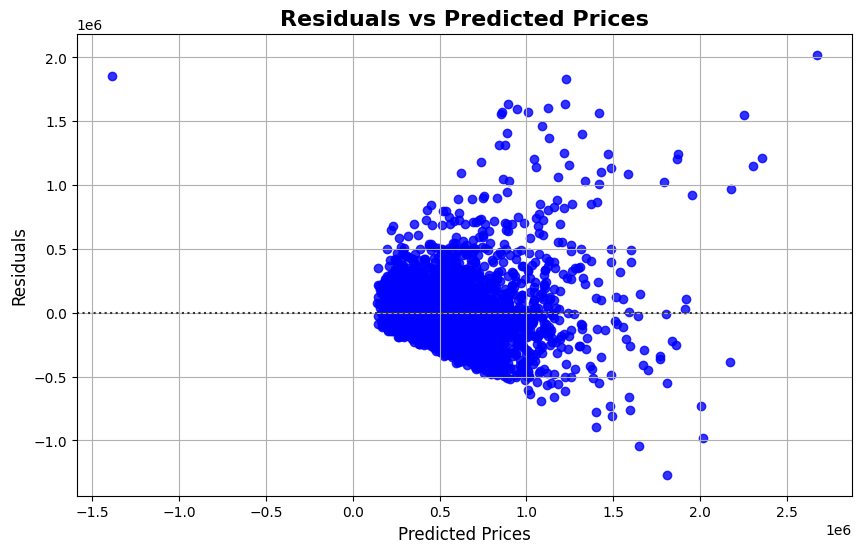

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot residuals to check for randomness with clearer visuals
residuals = y_test - y_pred

# Set the size of the plot for better visibility
plt.figure(figsize=(10, 6))

# Create the residuals plot
sns.residplot(x=y_pred, y=residuals, lowess=False, color='blue', line_kws={'color': 'red'})

# Customize plot with title and labels
plt.title('Residuals vs Predicted Prices', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


Code for Evaluating Model Accuracy:


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")



MAE: 124480.73
MSE: 36454956469.42
RMSE: 190931.81
R²: 0.70


Full Code Including Accuracy Calculation:


In [43]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are available from your model
r2 = r2_score(y_test, y_pred)

# Convert R² to accuracy percentage
accuracy_percentage = r2 * 100

print(f"Model Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy: 69.53%
